In [17]:
from tb_log_reader import LogReader
import seaborn as sns
import pandas as pd

## Read TF logs

In [2]:
! ls tensorboard_logs

brats17_2d_1_lr_0.001_epochs_50
brats17_2d_2_lr_0.001_epochs_50
brats17_2d_3_lr_0.001_epochs_50
brats17_2d_4_lr_0.001_epochs_50
brats17_2d_5_lr_0.001_epochs_50
brats17_2d_no_val_1_lr_0.001_epochs_50
brats17_2d_no_val_2_lr_0.001_epochs_50
brats17_2d_pre_1_lr_0.001_epochs_50
brats17_2d_pre_2_lr_0.001_epochs_50
brats17_2d_pre_3_lr_0.001_epochs_50
brats17_2d_pre_4_lr_0.001_epochs_50
brats17_2d_pre_5_lr_0.001_epochs_50
brats17_2d_pre_no_val_1_lr_0.001_epochs_50
brats17_2d_pre_no_val_2_lr_0.001_epochs_50
brats17_2d_pre_no_val_3_lr_0.001_epochs_50
jonas_net_2d_brats17_pretr_lr_0.001_epochs_50
jonas_net_3d_brats17_pretr_lr_0.0001_epochs_100
jonas_net_3d_brats17_pretr_lr_0.0001_epochs_50
jonas_net_3d_brats17_pretr_lr_0.001_epochs_50
jonas_net_3d_full_depth_brats17_pretr_lr_0.001_epochs_50
jonas_net_3d_lr_0.0001_epochs_100
jonas_net_3d_lr_0.0001_epochs_50
jonas_net_3d_lr_0.001_epochs_10
jonas_net_3d_lr_0.001_epochs_400
jonas_net_3d_lr_0.001_epochs_50
jonas_net_3d_other_depth_brats17_pretr_lr_0.0

In [8]:
lr_no_pretr_val = []
lr_pretr_val = []

for i in range(5):
    lr_no_pretr = LogReader('tensorboard_logs/brats17_2d_{}_lr_0.001_epochs_50'.format(i+1))
    lr_no_pretr_events = lr_no_pretr.load_run(0, test=True)
    lr_no_pretr_val.append({
        'edema': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'edema'),
        'tumor_core': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'tumor_core'),
        'enhancing': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'enhancing')
    })
    
    lr_pretr = LogReader('tensorboard_logs/brats17_2d_pre_{}_lr_0.001_epochs_50'.format(i+1))
    lr_pretr_val_events = lr_pretr.load_run(0, test=True)
    lr_pretr_val.append({
        'edema': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'edema'),
        'tumor_core': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'tumor_core'),
        'enhancing': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'enhancing')
    })

INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_1_lr_0.001_epochs_50/20190712-214136/test/events.out.tfevents.1562967697.py-notebook0-82364-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_1_lr_0.001_epochs_50/20190712-214136/test/events.out.tfevents.1562967697.py-notebook0-82364-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_1_lr_0.001_epochs_50/20190711-131045/test/events.out.tfevents.1562850647.py-notebook0-82356-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_1_lr_0.001_epochs_50/20190711-131045/test/events.out.tfevents.1562850647.py-notebook0-82356-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_2_lr_0.001_epochs_50/20190713-024141/test/events.out.tfevents.1562985702.py-notebook0-82364-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_2_lr_0.001_epochs_50/20190713-024141/test/events.out.tfevents.1562985702.py-notebook0-82364-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_2_lr_0.001_epochs_50/20190710-013519/test/events.out.tfevents.1562722520.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_2_lr_0.001_epochs_50/20190710-013519/test/events.out.tfevents.1562722520.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_3_lr_0.001_epochs_50/20190713-080619/test/events.out.tfevents.1563005180.py-notebook0-82364-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_3_lr_0.001_epochs_50/20190713-080619/test/events.out.tfevents.1563005180.py-notebook0-82364-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_3_lr_0.001_epochs_50/20190710-060611/test/events.out.tfevents.1562738772.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_3_lr_0.001_epochs_50/20190710-060611/test/events.out.tfevents.1562738772.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_4_lr_0.001_epochs_50/20190713-130256/test/events.out.tfevents.1563022976.py-notebook0-82364-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_4_lr_0.001_epochs_50/20190713-130256/test/events.out.tfevents.1563022976.py-notebook0-82364-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_4_lr_0.001_epochs_50/20190710-101156/test/events.out.tfevents.1562753517.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_4_lr_0.001_epochs_50/20190710-101156/test/events.out.tfevents.1562753517.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_5_lr_0.001_epochs_50/20190713-192541/test/events.out.tfevents.1563045944.py-notebook0-82364-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_5_lr_0.001_epochs_50/20190713-192541/test/events.out.tfevents.1563045944.py-notebook0-82364-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/test/events.out.tfevents.1562769902.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/test/events.out.tfevents.1562769902.py-notebook0-82327-prod


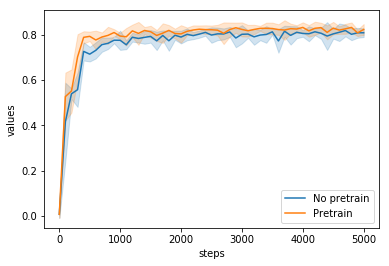

In [54]:
# edema

df = pd.DataFrame()

df_no_pretr = pd.concat([lr_no_pretr_val[i]['tumor_core'] for i in range(5)]) # .iloc[:20]
df_pretr = pd.concat([lr_pretr_val[i]['tumor_core'] for i in range(5)]) # .iloc[:20]

# relplot

sns.lineplot(x='steps', y='values', data=df_no_pretr, markers=True, label='No pretrain', ci='sd')
sns.lineplot(x='steps', y='values', data=df_pretr, markers=True, label='Pretrain', ci='sd')

# for i in range(5):
    
    # sns.lineplot(x='steps', y='values', data=lr_no_pretr_val[i]['tumor_core'], dashes=True, markers=True)
    # sns.lineplot(x='steps', y='values', data=lr_pretr_val[i]['edema'], dashes=False, markers=True)


In [51]:
df_no_pretr.iloc[:20]

,steps,times,values
0,0,1.562968e+09,0.000000
1,100,1.562968e+09,0.365665
2,200,1.562968e+09,0.562719
3,300,1.562969e+09,0.664160
4,400,1.562969e+09,0.745093
5,500,1.562969e+09,0.766337
6,600,1.562970e+09,0.754804
7,700,1.562970e+09,0.788999
8,800,1.562970e+09,0.753629
9,900,1.562971e+09,0.788925


In [40]:
lr = LogReader('tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50')

In [41]:
train_events = lr.load_run(0, test=False)
test_events = lr.load_run(0, test=True)

INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/train/events.out.tfevents.1562769901.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/train/events.out.tfevents.1562769901.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/test/events.out.tfevents.1562769902.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/test/events.out.tfevents.1562769902.py-notebook0-82327-prod


In [42]:
lr.get_available_scalars(train_events)

['edema', 'tumor_core', 'loss', 'enhancing']

In [43]:
lr.get_available_scalars(test_events)

['edema', 'enhancing', 'tumor_core', 'loss']

In [44]:
train_losses = lr.get_df_from_scalar(train_events, 'loss')
train_dices = lr.get_df_from_scalar(train_events, 'tumor_core')
test_losses = lr.get_df_from_scalar(test_events, 'loss')
test_dices = lr.get_df_from_scalar(test_events, 'tumor_core')

In [11]:
# fa: why is the train loss at the end of the training still so high, but accuracy is good?
train_losses.iloc[-1]

times     1.562523e+09
steps     9.900000e+01
values    1.198570e-02
Name: 99, dtype: float64

In [12]:
# backprop
train_losses.iloc[-1]

times     1.562523e+09
steps     9.900000e+01
values    1.198570e-02
Name: 99, dtype: float64

In [13]:
# backprop
train_dices.head()

,times,steps,values
0,1.562523e+09,99,0.193524


In [12]:
test_accuracies

,times,steps,values
0,1.554997e+09,938,80.980003
1,1.554998e+09,1876,87.239998
2,1.554998e+09,2814,87.360001
3,1.554998e+09,3752,91.290001
4,1.554998e+09,4690,90.720001
5,1.554998e+09,5628,89.800003
6,1.554998e+09,6566,92.870003
7,1.554998e+09,7504,90.809998
8,1.554998e+09,8442,92.040001
9,1.554998e+09,9380,93.720001


In [32]:
train_dices.iloc[-1]

steps     9.999000e+03
times     1.561642e+09
values    9.334302e-01
Name: 99, dtype: float64

In [16]:
train_losses.head()

,times,steps,values
0,1.562521e+09,0,0.013753
1,1.562521e+09,1,0.013669
2,1.562521e+09,2,0.013583
3,1.562521e+09,3,0.013447
4,1.562521e+09,4,0.013506


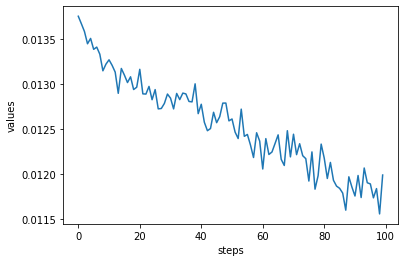

In [14]:
sns.lineplot(x='steps', y='values', data=train_losses)

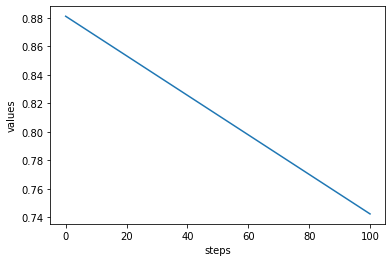

In [15]:
sns.lineplot(x='steps', y='values', data=test_losses)

In [10]:
train_dices.head()

,times,steps,values
0,1.562523e+09,99,0.193524


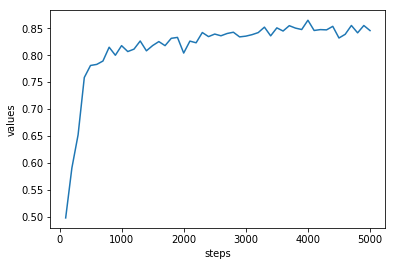

In [8]:
sns.lineplot(x='steps', y='values', data=train_dices)

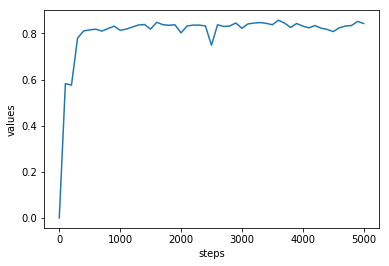

In [9]:
sns.lineplot(x='steps', y='values', data=test_dices)

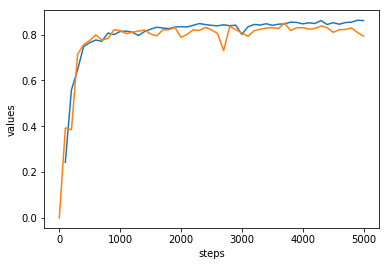

In [45]:
sns.lineplot(x='steps', y='values', data=train_dices)
sns.lineplot(x='steps', y='values', data=test_dices)

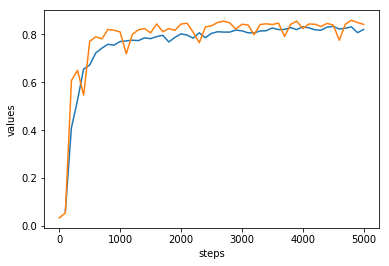

In [20]:
sns.lineplot(x='steps', y='values', data=train_dices)
sns.lineplot(x='steps', y='values', data=test_dices)

In [25]:
test_dices.iloc[-1]

steps     5.000000e+03
times     1.562633e+09
values    8.248324e-01
Name: 50, dtype: float64

In [21]:
test_dices.iloc[-1]

steps     5.000000e+03
times     1.562680e+09
values    8.416548e-01
Name: 50, dtype: float64

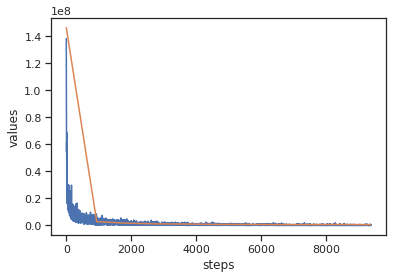

In [15]:
sns.lineplot(x='steps', y='values', data=train_losses)
sns.lineplot(x='steps', y='values', data=test_losses)